# EDA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Here are the diffrent imported libraries: pandas & matplotlib.
Below is where the CSV dataframes are read and formatted for more readability.
Called info() to get a generalization of the data.
Called head() to view the first few rows of the dataframe.

In [2]:
order= pd.read_csv('/datasets/instacart_orders.csv',sep = ';')
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
product= pd.read_csv('/datasets/products.csv', sep= ';')
product.info()
product.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
order_product= pd.read_csv('/datasets/order_products.csv', sep= ';')
order_product.info(show_counts=True)
order_product.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
aisle= pd.read_csv('/datasets/aisles.csv', sep= ';')
aisle.info()
aisle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
department= pd.read_csv('/datasets/departments.csv', sep= ';')
department.info()
department.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [7]:
#loading in dataframes and cleaning up the look of it to be more readable.

As said above in the comments, the dataframes have been read in to become more readable and more visually appealing to the reader.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
order.duplicated().sum()

15

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
order[(order['order_hour_of_day']== 2)&(order['order_dow']== 3)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
# Remove duplicate orders
orders= order.drop_duplicates()

In [11]:
# Double check for duplicate rows
orders.duplicated().sum()


0

In [12]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

Checking for the number of duplicated rows in the orders Dataframe.
Filtered on multiple conditions, assumung 0:00= 0AM & sunday=0... total of 121 orders within the criteria.
Deleted the duplicates and checked again for duplicates.

### `products` data frame

In [13]:
# Check for fully duplicate rows
product.duplicated().sum()

0

In [14]:
# Check for just duplicate product IDs
product['product_id'].duplicated().sum()

0

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
product['product_name']=product['product_name'].str.lower()
product['product_name'].duplicated().sum()

1361

In [16]:
# Check for duplicate product names that aren't missing
product[~product['product_name'].isnull()]['product_name'].duplicated().sum()

104

Looked though the products Dataframe and searching for duplicates, then doing the same for the product name. Changed the product names to lowercase for better comparision. Then checking for duplicates in the product names that werent missing.

### `departments` data frame

In [17]:
department.duplicated().sum()

0

In [18]:
#checking for duplicates in the departments

Checked through the department dataframe looking for duplicate rows.

### `aisles` data frame

In [19]:
aisle.duplicated().sum()

0

In [20]:
#checking for duplicates in the aisle file

Checking for duplicates in the aisles dataframe.

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
order_product.duplicated().sum()

0

In [22]:
# Double check for any other tricky duplicates
order_product.value_counts().nunique()

1

Checking for duplicates in the order products dataframe, and doubble checking through the value counts method.

## Find and remove missing values


### `products` data frame

In [23]:
product.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [24]:
# Are all of the missing product names associated with aisle ID 100?
print(len(product[(product['product_name'].isna()) & (product['aisle_id']==100)]))

print(product['product_name'].isna().sum())

1258
1258


All 1258 missing names are from aisle 100

In [25]:
# Are all of the missing product names associated with department ID 21?
print(len(product[(product['product_name'].isna()) & (product['department_id']==21)]))
print(product['product_name'].isna().sum())

1258
1258


All 1258 missing names are associated with deprtment 21.

In [26]:
# What is this ailse and department?
print(aisle.loc[aisle['aisle_id']==100])
print(department.loc[department['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


The missing names are from the missing aisle and missing department.

In [27]:
# Fill missing product names with 'Unknown'
product['product_name']=product['product_name'].fillna(value='Unknown')
print(product[product['aisle_id']==100])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Filled in the missing product names with "Unknown" string.

### `orders` data frame

In [28]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# Are there any missing values where it's not a customer's first order?
orders[(orders['order_number']!= 1)]['days_since_prior_order'].isna().sum()

0

All orders are from their first.

### `order_products` data frame

In [30]:
order_product.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Checking for missing valies in the order products Dataframe.

In [31]:
# What are the min and max values in this column?
order_product['order_id'].min()

4

Finding the Minimum value in the order id.

In [32]:
order_product['order_id'].max()
#max value in the column

3421079

Finding the Maximum value in the order id.

In [33]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_ids = order_product[order_product['add_to_cart_order'].isna()]['order_id'].unique()

Saved the missing values in 'add_to_cart_order' to missing_ids value.

In [34]:
missing_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [35]:
# Do all orders with missing values have more than 64 products?
x= order_product[order_product['order_id'].isin(missing_ids)].groupby('order_id')['product_id'].count()

In [36]:
x.sort_values(ascending=False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64

Checking order products that have missing values and more than 64 products.

In [37]:
# Replace missing values with 999 and convert column to integer type
order_product['add_to_cart_order']=order_product['add_to_cart_order'].fillna(999).astype('int')
print(order_product[order_product['add_to_cart_order']==999])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1717990        4142                999          0
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999          0
4511400   1633337         260                999          0
4517562    404157        9517                999          0
4534112   1673227       17835                999          0
4535739   1832957       17949                999          1

[836 rows x 4 columns]


replaceing missing values with '999' and altering teh column type to int.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [38]:
valid_hours=orders['order_hour_of_day'].between(0,23).all()
valid_hours

True

In [39]:
valid_days= orders['order_dow'].between(0,6).all()
valid_days

True

Checking that the data makes sense with the values given by checking the range of 0-23 for the time and 0-6 for the days of the week.

### [A2] What time of day do people shop for groceries?

<AxesSubplot:title={'center':'Time people shop'}, xlabel='Time of day', ylabel='number of orders'>

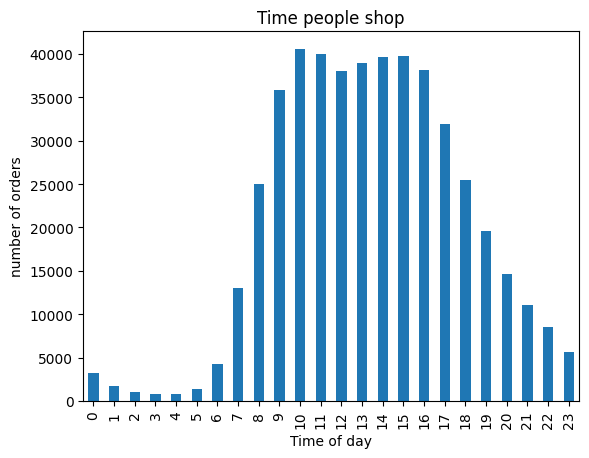

In [40]:
time_shopping= orders['order_hour_of_day'].value_counts().sort_index()
time_shopping.plot(kind='bar', title= 'Time people shop', xlabel= 'Time of day', ylabel='number of orders')

bar graph showing what time of day people go shopping for groceries.

### [A3] What day of the week do people shop for groceries?

<AxesSubplot:title={'center':'Days people go shopping'}, xlabel='Day', ylabel='Number of orders'>

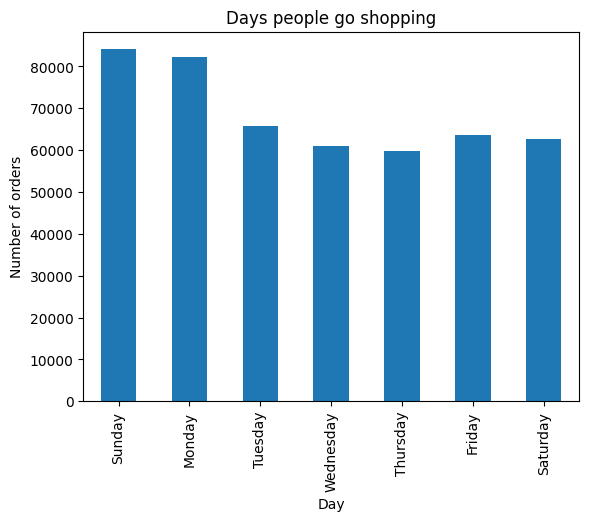

In [41]:
day_shopping= orders['order_dow'].value_counts().sort_index()
days=['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday']
day_shopping.index=days
day_shopping.plot(kind='bar', title="Days people go shopping", xlabel='Day', ylabel='Number of orders')

Graph showing the days of the week that people go shopping.

### [A4] How long do people wait until placing another order?

<AxesSubplot:title={'center':'Time till next order'}, xlabel='days since last order', ylabel='number of orders'>

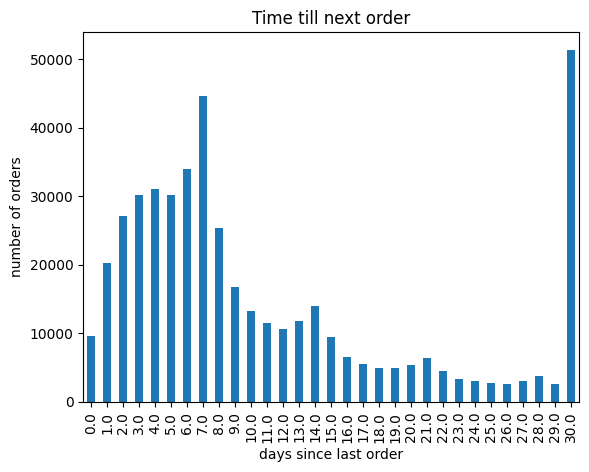

In [42]:
next_order= orders['days_since_prior_order'].value_counts().sort_index()
next_order.plot(kind='bar', title='Time till next order',xlabel='days since last order', ylabel='number of orders')

Time elapsed between last order bar graph.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [43]:
wednesday= orders[orders['order_dow']==3]['order_hour_of_day']
Saturday= orders[orders['order_dow']==6]['order_hour_of_day']

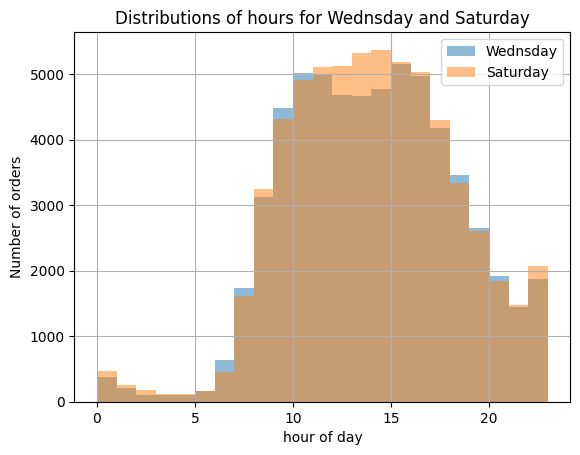

In [44]:
wednesday.hist(bins=23,alpha=0.5,label='Wednsday')
Saturday.hist( bins=23,alpha= 0.5,label='Saturday')
plt.title('Distributions of hours for Wednsday and Saturday')
plt.xlabel('hour of day')
plt.ylabel('Number of orders')
plt.legend()
plt.show()

Wednsday and saturday have similar distributions throughout the day, peaking around 13-15 on saturday slightly more than wednsday.

### [B2] What's the distribution for the number of orders per customer?

In [45]:
count=orders.groupby('user_id')['order_number'].count()

<AxesSubplot:ylabel='Frequency'>

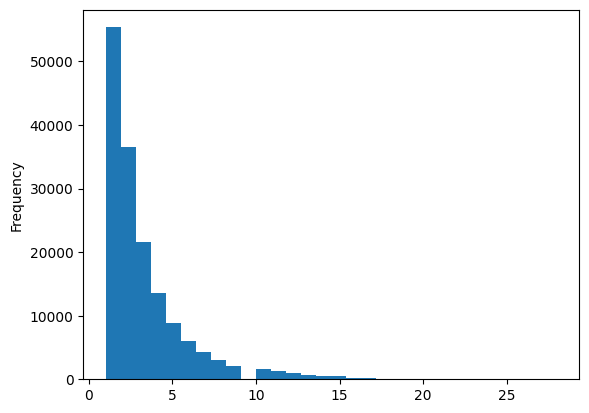

In [46]:
count.plot(kind='hist', xlabel='Number of orders', ylabel='Number of customers', bins=30)

The most number of customers purchased less frequently.

### [B3] What are the top 20 popular products (display their id and name)?

In [47]:
combined= order_product.merge(product, on= 'product_id')
combined

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,chicken breast tenders breaded,129,1
1,147172,11440,7,1,chicken breast tenders breaded,129,1
2,3341719,11440,4,1,chicken breast tenders breaded,129,1
3,1938779,11440,8,1,chicken breast tenders breaded,129,1
4,1728338,11440,23,0,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,sweet teriyaki chicken oven sauce,5,13
4545003,2621676,25201,10,0,crisp waters candle scents,101,17
4545004,937623,49153,2,0,shine collection brillance shampoo,22,11
4545005,532895,8182,1,0,total mint stripe gel toothpaste,20,11


In [48]:
top_20= combined['product_name'].value_counts().head(20)

In [49]:
top_20

banana                      66050
bag of organic bananas      53297
organic strawberries        37039
organic baby spinach        33971
organic hass avocado        29773
organic avocado             24689
large lemon                 21495
strawberries                20018
limes                       19690
organic whole milk          19600
organic raspberries         19197
organic yellow onion        15898
organic garlic              15292
organic zucchini            14584
organic blueberries         13879
cucumber kirby              13675
organic fuji apple          12544
organic lemon               12232
apple honeycrisp organic    11993
organic grape tomatoes      11781
Name: product_name, dtype: int64

breakdown of the top 20 products, showing a list with the product name and product id.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [50]:
item_per_order= order_product.groupby('order_id')['product_id'].count()
item_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

<AxesSubplot:title={'center':'Items typically bought in one order'}, ylabel='Frequency'>

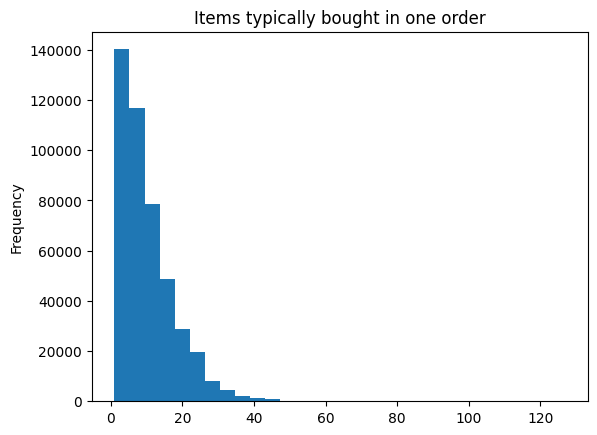

In [51]:
item_per_order.plot(kind= 'hist', bins=30,xlabel='Number of items', ylabel='Number of orders', title='Items typically bought in one order')

less items are bought more frequently than many items. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [52]:
reorder= order_product[order_product['reordered']==1]

In [53]:
top_20_orders= reorder['product_id'].value_counts().head(20)

In [54]:
reorder_names= product[product['product_id'].isin(top_20_orders.index)][['product_name','product_id']]

In [55]:
reorder_names

,product_name,product_id
5875,organic lemon,5876
8276,apple honeycrisp organic,8277
13175,bag of organic bananas,13176
16796,strawberries,16797
21136,organic strawberries,21137
21902,organic baby spinach,21903
22934,organic yellow onion,22935
24851,banana,24852
24963,organic garlic,24964
26208,limes,26209


reorder_names containes a list of the top 20 most frequently ordered products, including teh product name and id number.

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [56]:
first_item= order_product[order_product['add_to_cart_order']==1]

In [57]:
y= first_item['product_id'].value_counts().head(20)

In [58]:
top= product[product['product_id'].isin(y.index)][['product_id', 'product_name']]

In [59]:
top

,product_id,product_name
195,196,soda
5784,5785,organic reduced fat 2% milk
12340,12341,hass avocados
13175,13176,bag of organic bananas
16796,16797,strawberries
19659,19660,spring water
21136,21137,organic strawberries
21902,21903,organic baby spinach
22934,22935,organic yellow onion
24851,24852,banana


top contains a list of the top items that people put in their cart first.